In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = "paper", font = "monospace", font_scale=2)

# Define input training data and parameter

In [2]:
input_signal_num = 50000 # number of training data
input_data = 5*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
mean_w = 0.0 # mean of noise
std_w = 1.0 # std of noise
k = 0.2

# Define encoder and decoder (all in one network)

In [3]:
# input x
x = tf.placeholder(tf.float32, [None, 1])
tmp_c = tf.placeholder(tf.float32, [None, 1])
disp = tf.placeholder(tf.float32, [None, 1])
# first neural network (encoder)
l1 = tf.layers.dense(inputs = x, units = 512, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))
        
l2 = tf.layers.dense(inputs = l1, units = 256, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l3_a = tf.layers.dense(inputs = l2, units = 128, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l3_ab = tf.layers.dense(inputs = l3_a, units = 64, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

# output of first neural network
u1 = tf.layers.dense(inputs = l3_ab, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1))

# gaussian noise
w = tf.random_normal([input_signal_num, 1], mean=mean_w, stddev=std_w, dtype=tf.float32, seed=None)

# add u1 with gaussian noise
y = tf.add(tf.multiply(tf.add(u1, w),tmp_c), disp)

# second neural network (decoder)
l3 = tf.layers.dense(inputs = y, units = 512, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))
        
l4 = tf.layers.dense(inputs = l3, units = 256, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l5_a = tf.layers.dense(inputs = l4, units = 128, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l5_ab = tf.layers.dense(inputs = l5_a, units = 64, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

# output of second neural network
u2 = tf.layers.dense(inputs = l5_ab, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1))

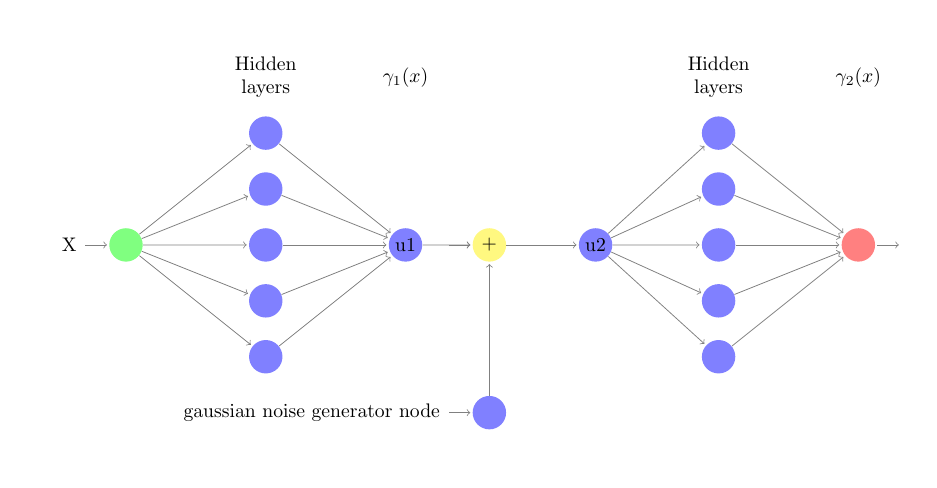

# Define loss function

In [4]:
loss = k * tf.reduce_mean(tf.square(u1 - x)) + tf.reduce_mean(tf.square(u2 - u1)) # k(u1-x)^2+(u2-u1)^2
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
x_axis = np.array([np.linspace(-15, 15, num=input_signal_num).tolist()]).T

# Before optimization with loss function

In [7]:
y_axis = sess.run(u1, feed_dict = {x:x_axis})

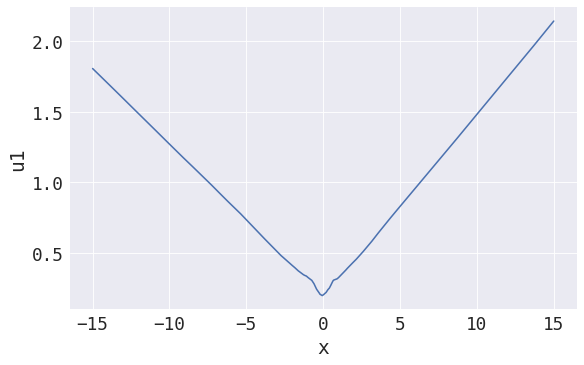

In [8]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('u1')
plt.show()

# Optimization

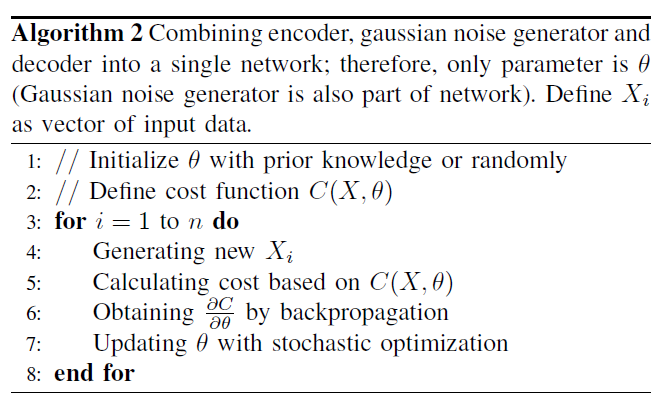

Iteration  0 : current loss: 269.302


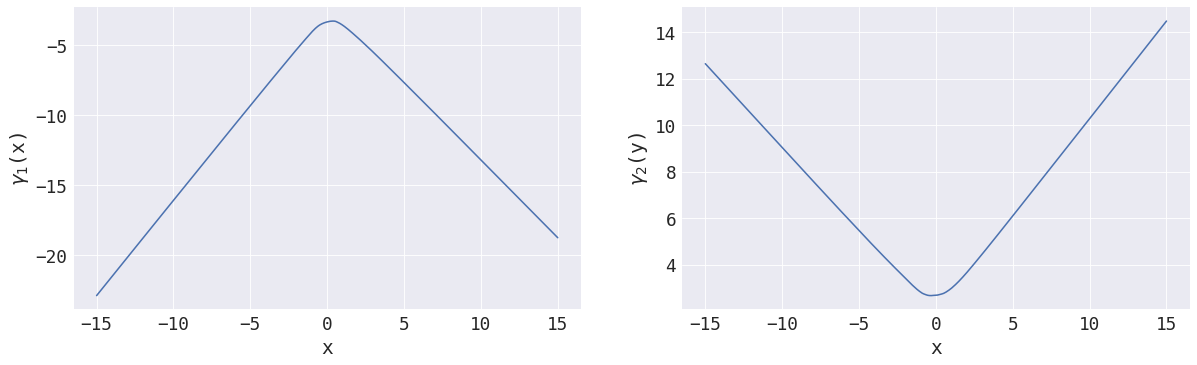

Iteration  100 : current loss: 0.978068


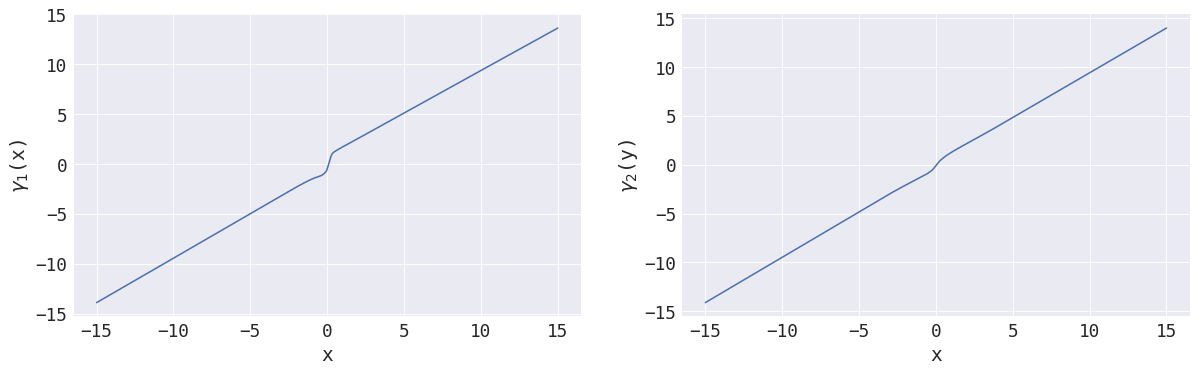

Iteration  200 : current loss: 0.935767


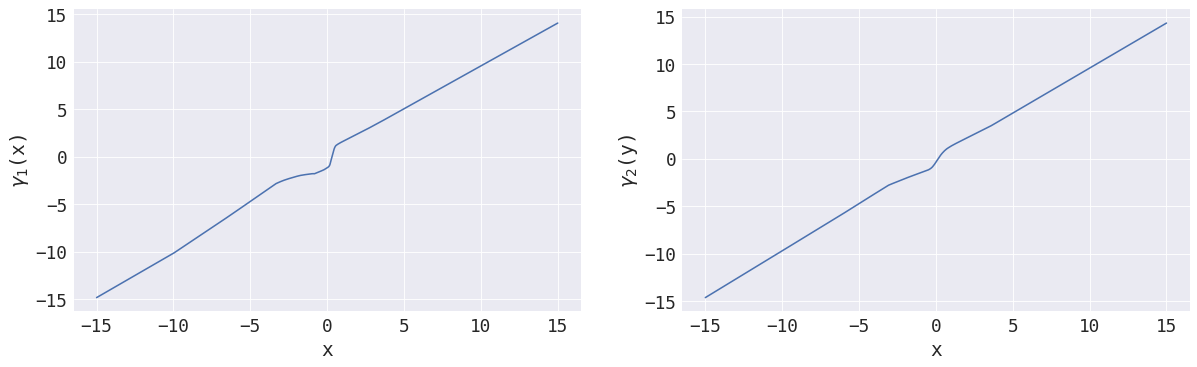

Iteration  300 : current loss: 0.996805


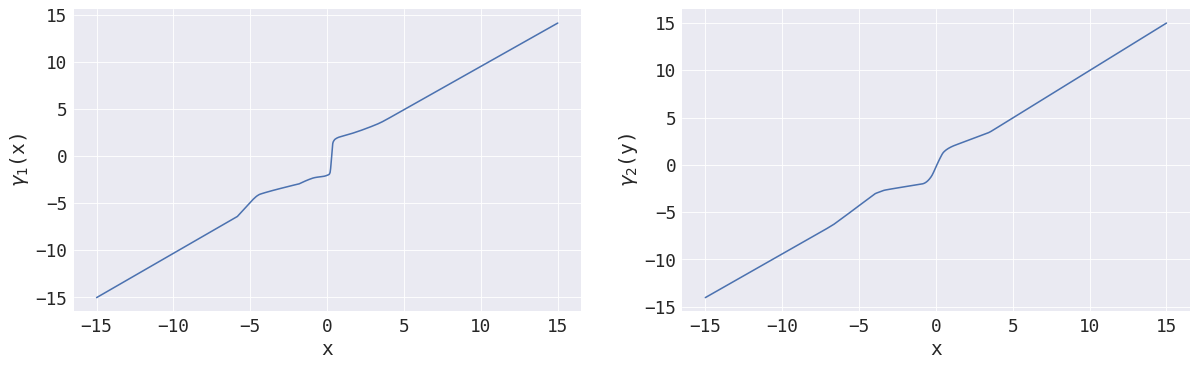

Iteration  400 : current loss: 0.849011


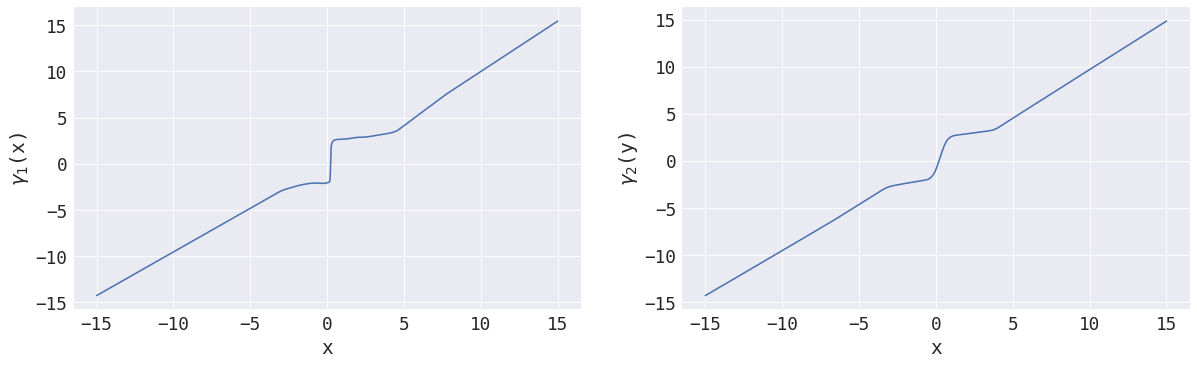

Iteration  500 : current loss: 0.820602


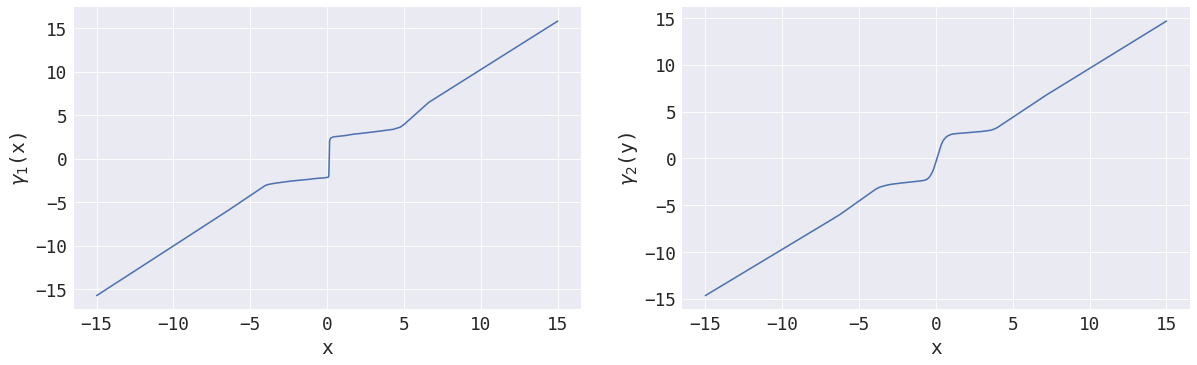

Iteration  600 : current loss: 0.865828


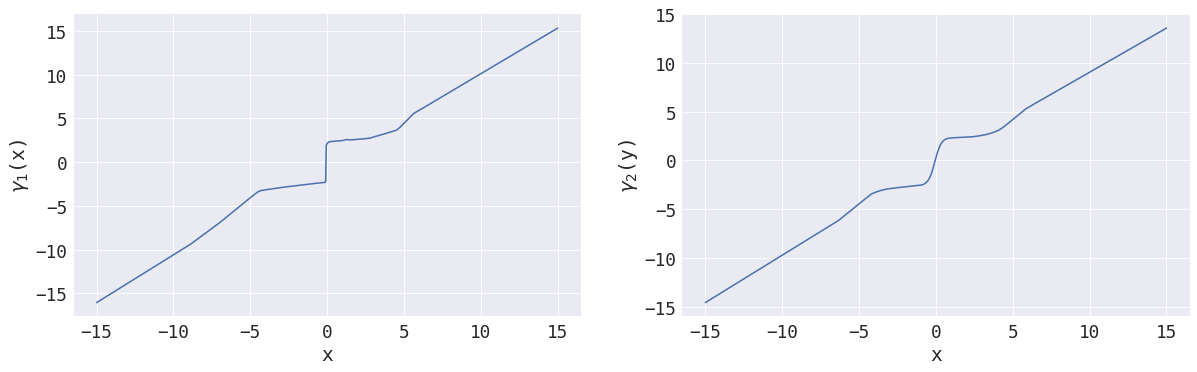

Iteration  700 : current loss: 0.779347


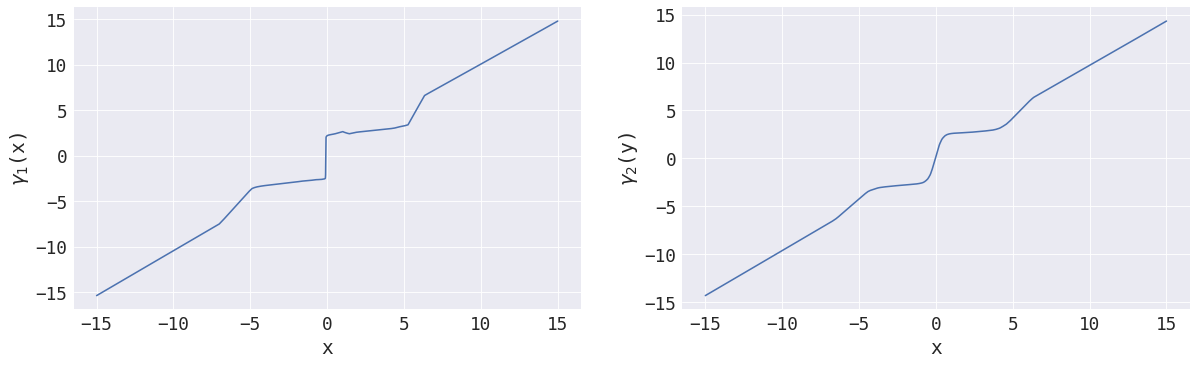

Iteration  800 : current loss: 0.728418


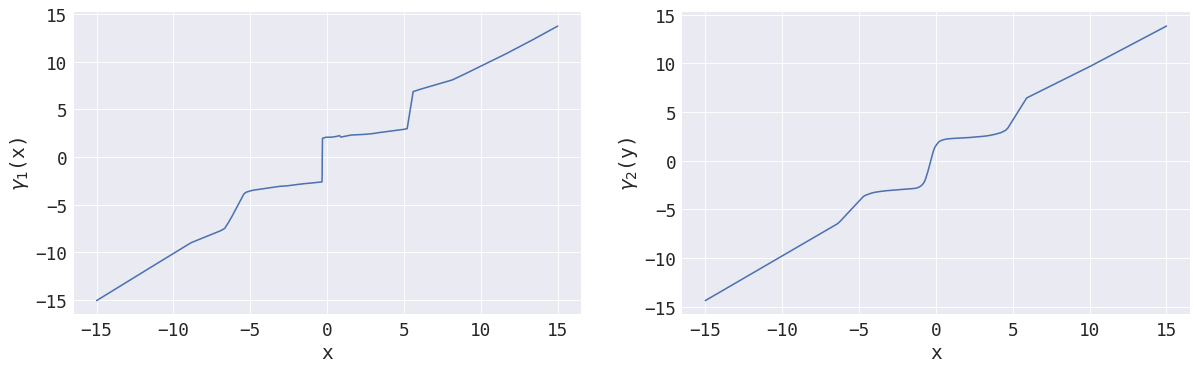

Iteration  900 : current loss: 0.73032


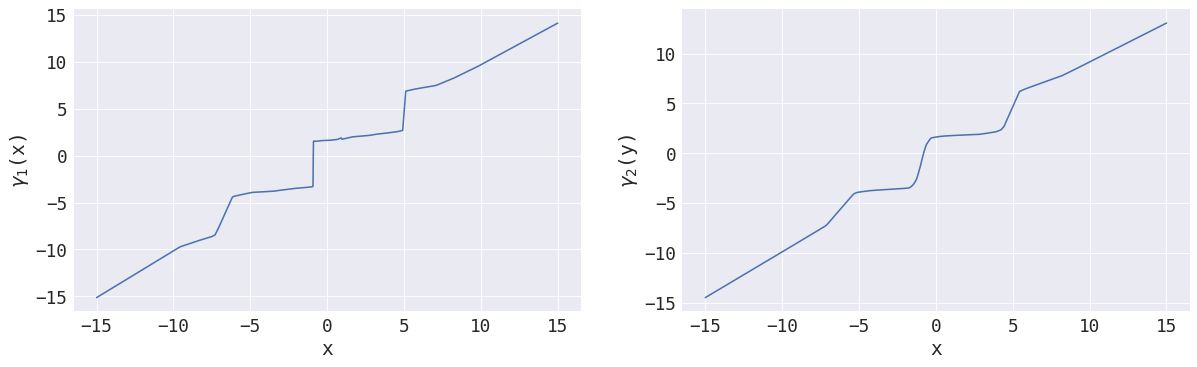

Iteration  1000 : current loss: 0.689267


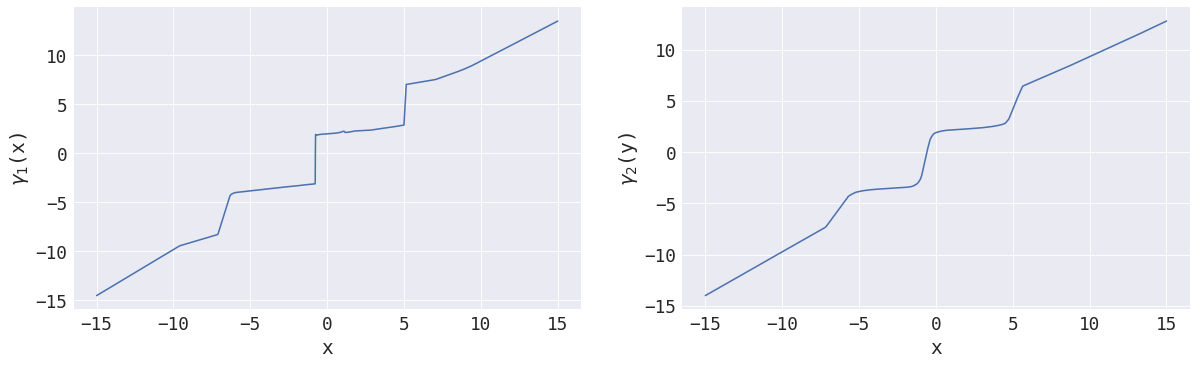

Iteration  1100 : current loss: 0.696382


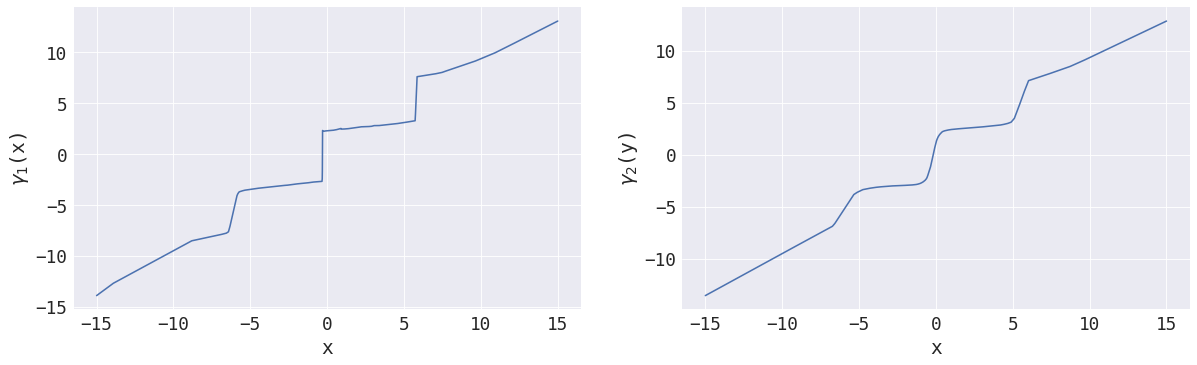

Iteration  1200 : current loss: 0.69268


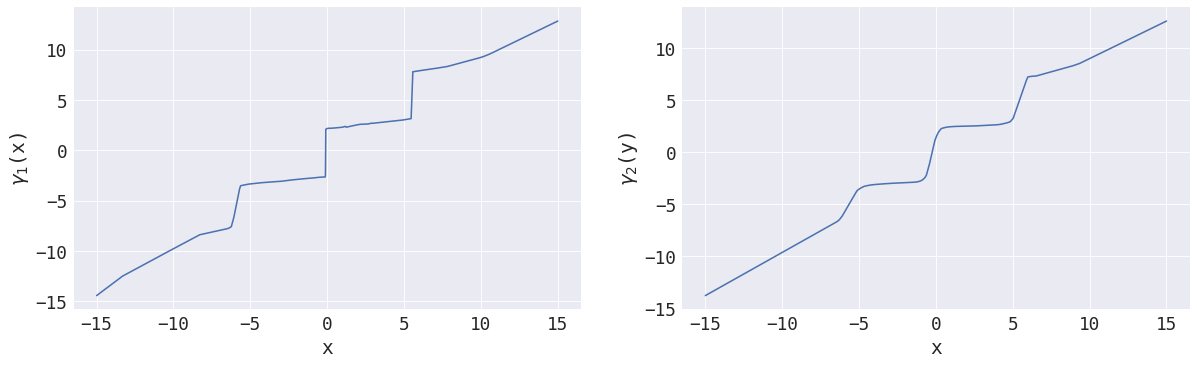

Iteration  1300 : current loss: 0.705787


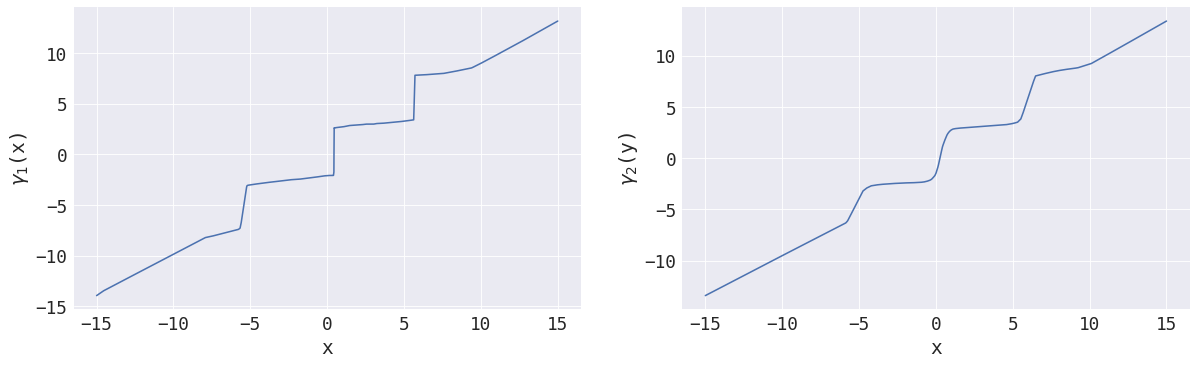

Iteration  1400 : current loss: 0.694717


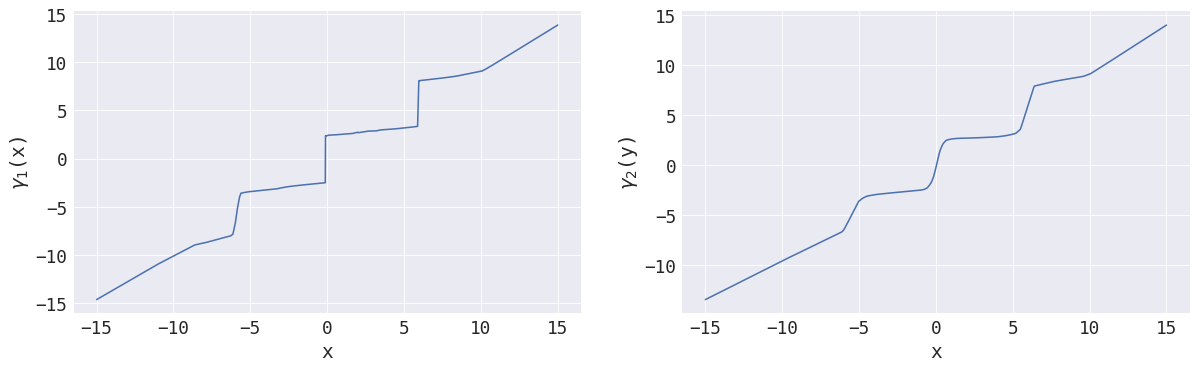

Iteration  1500 : current loss: 0.664212


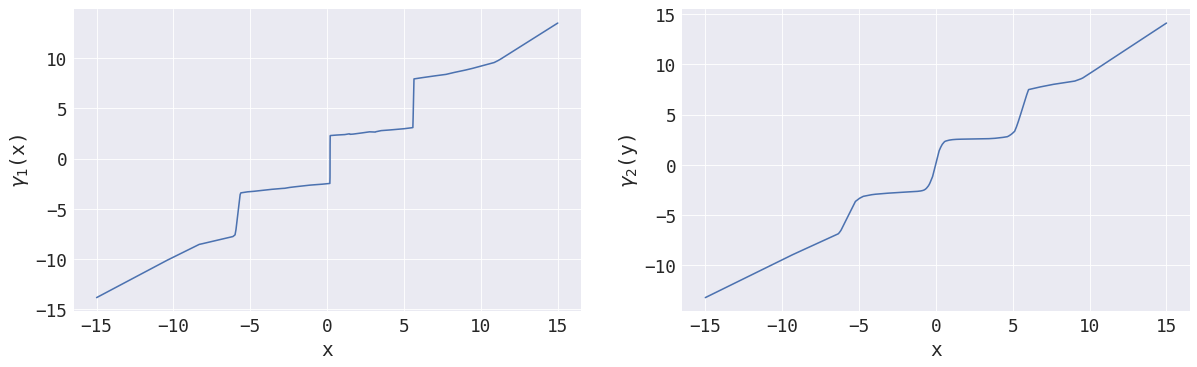

Iteration  1600 : current loss: 0.676694


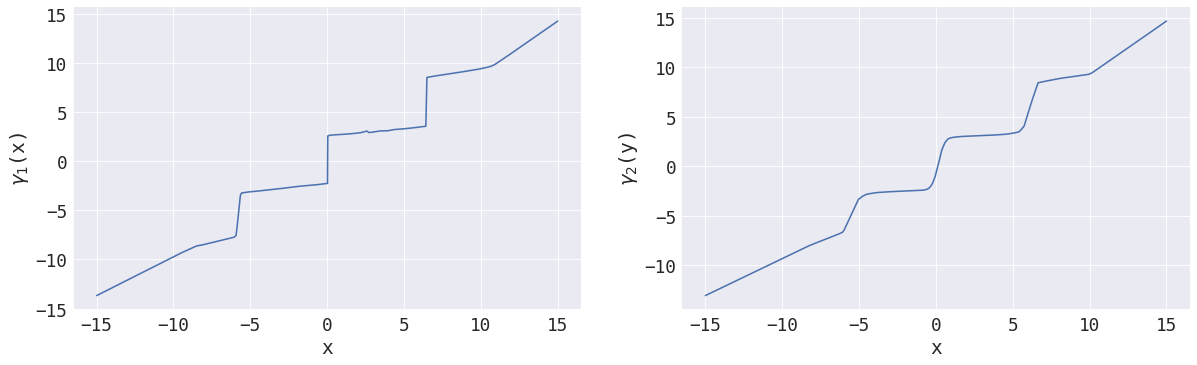

Iteration  1700 : current loss: 0.666696


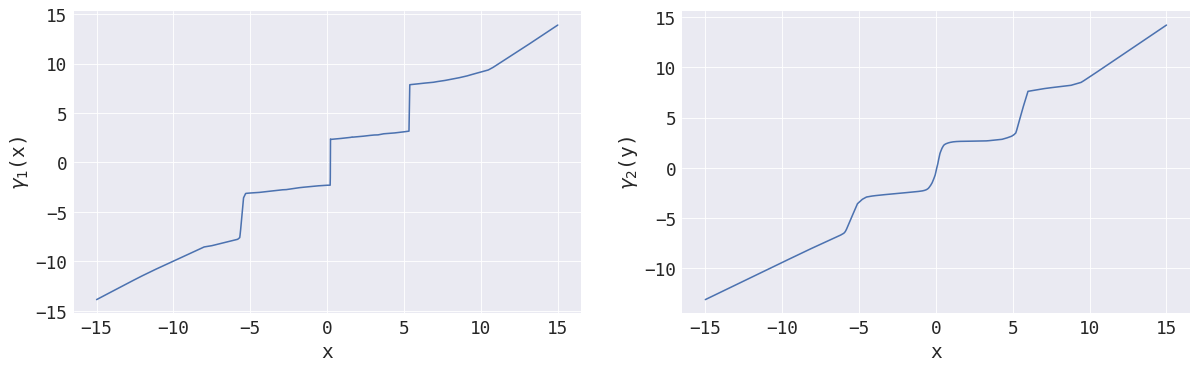

Iteration  1800 : current loss: 0.689207


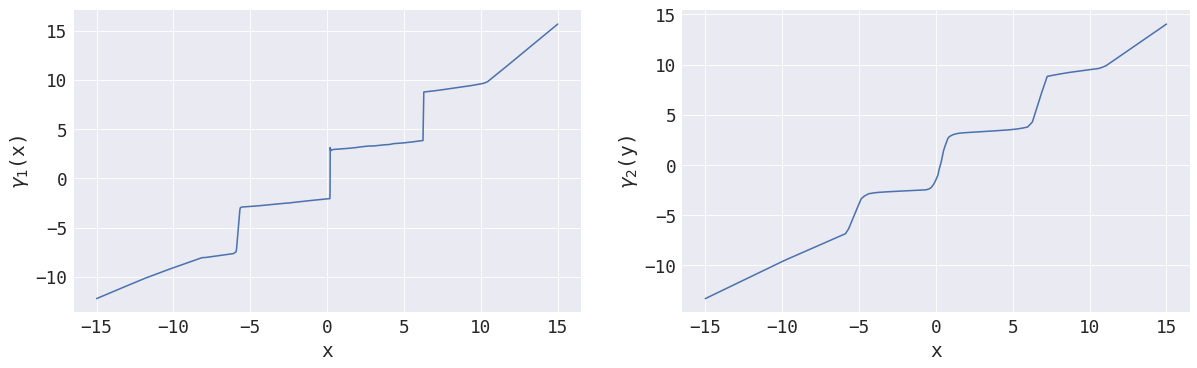

Iteration  1900 : current loss: 0.686334


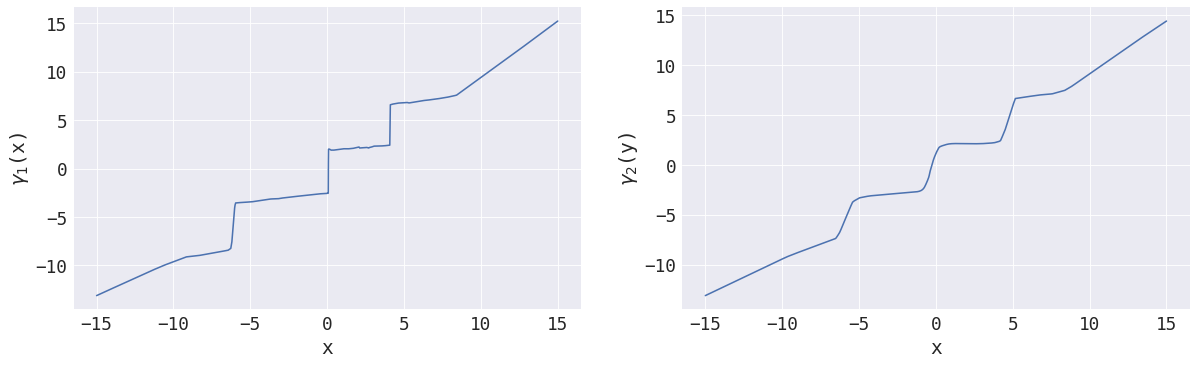

Iteration  2000 : current loss: 0.721694


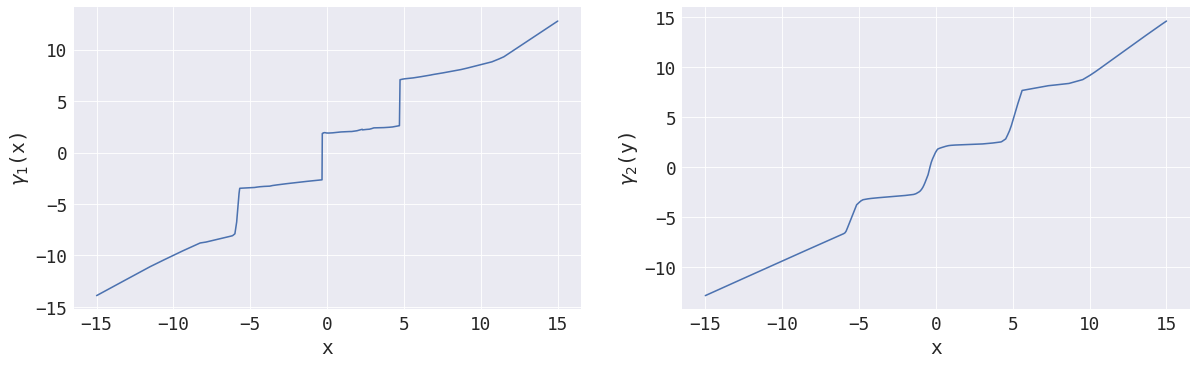

Iteration  2100 : current loss: 0.644733


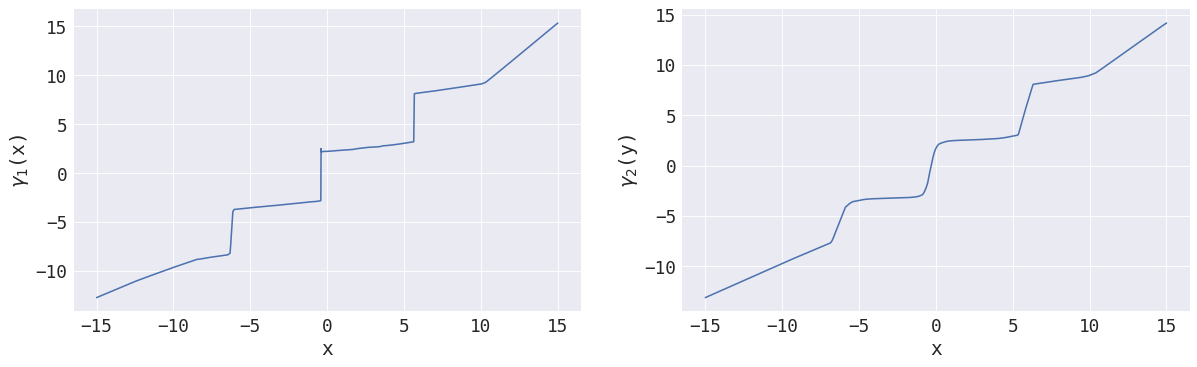

Iteration  2200 : current loss: 0.700872


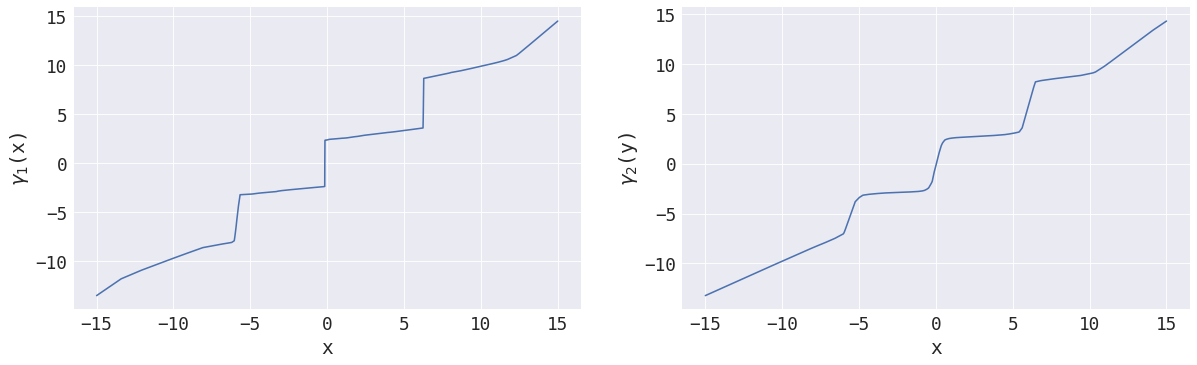

Iteration  2300 : current loss: 0.641002


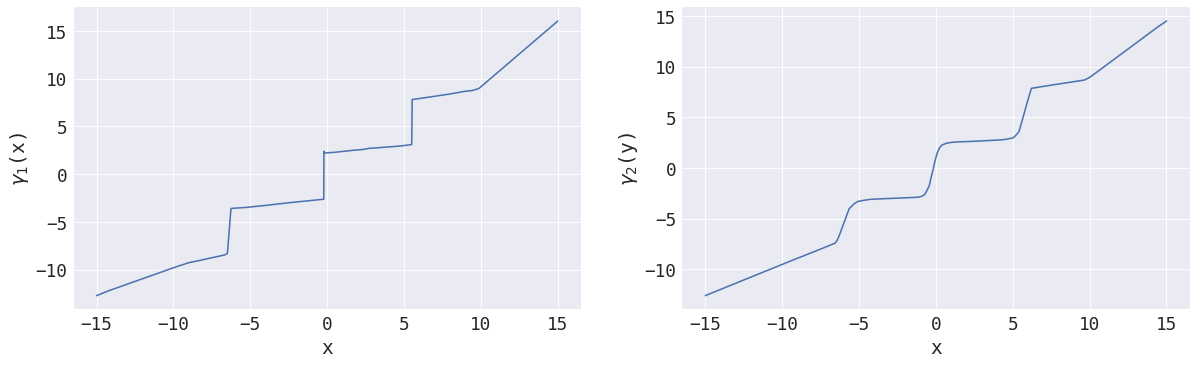

Iteration  2400 : current loss: 0.657863


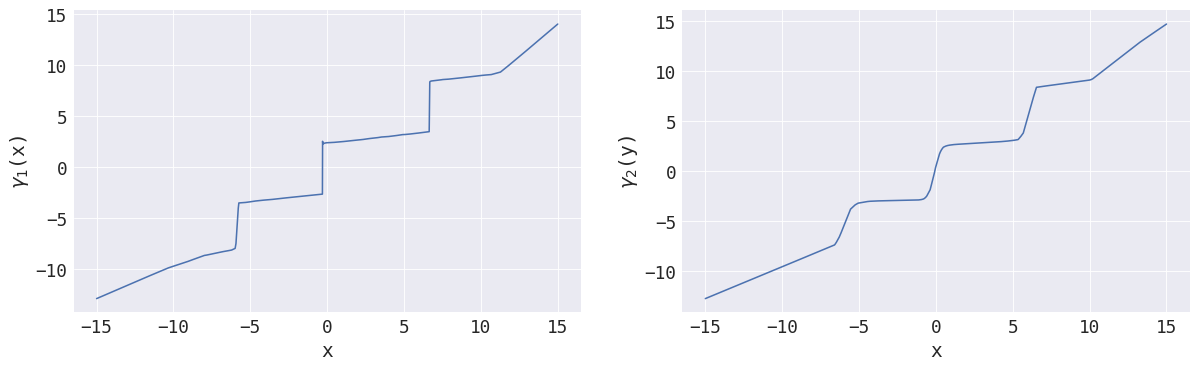

Iteration  2500 : current loss: 0.68909


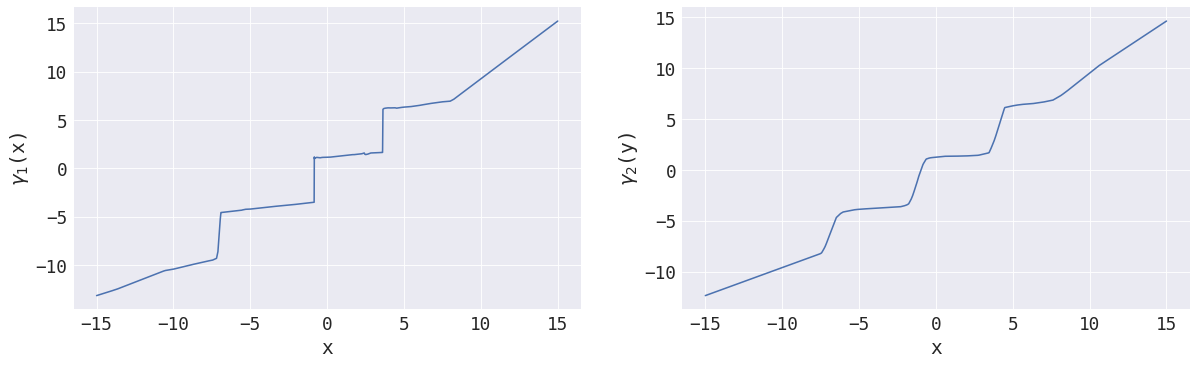

Iteration  2600 : current loss: 0.6366


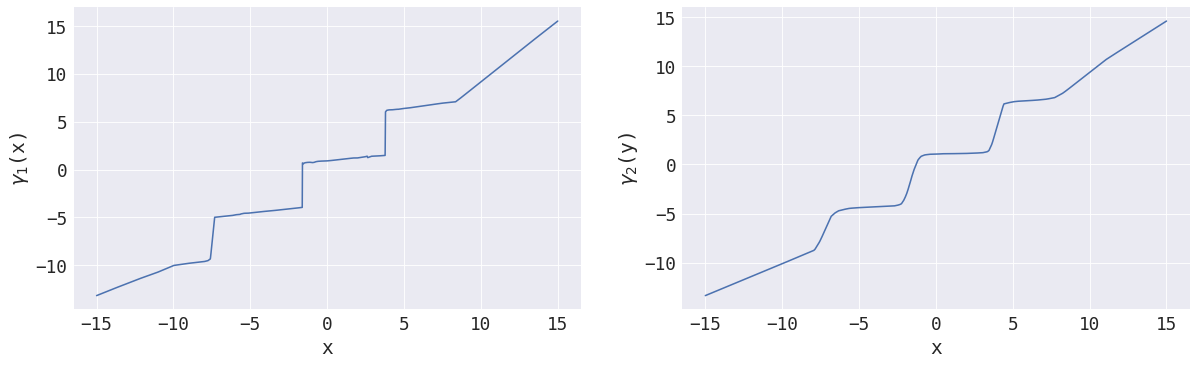

Iteration  2700 : current loss: 0.684458


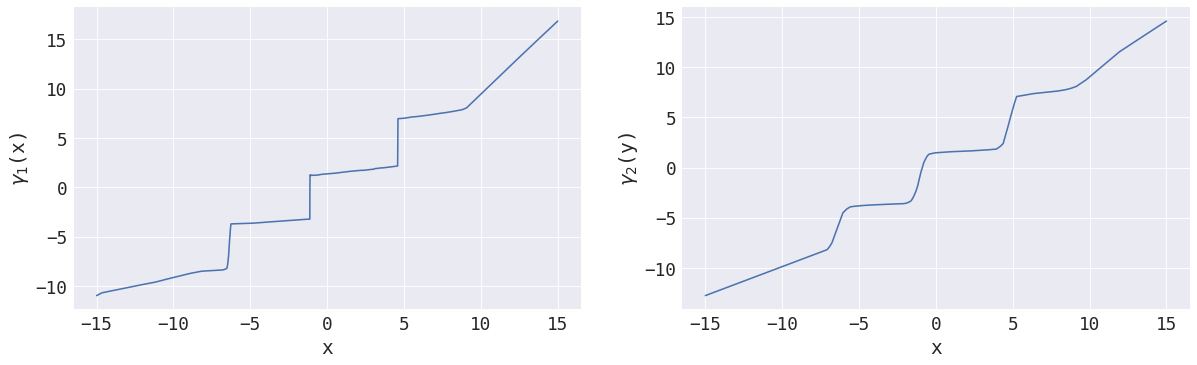

Iteration  2800 : current loss: 0.633557


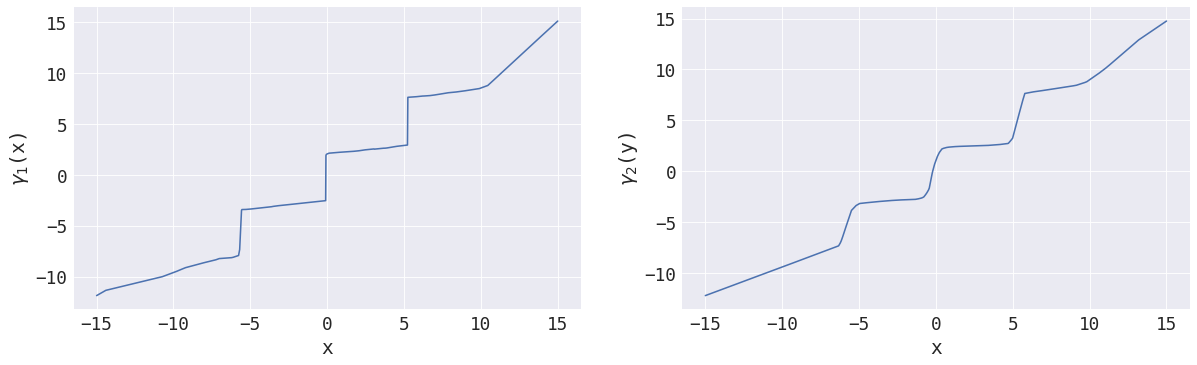

Iteration  2900 : current loss: 0.709858


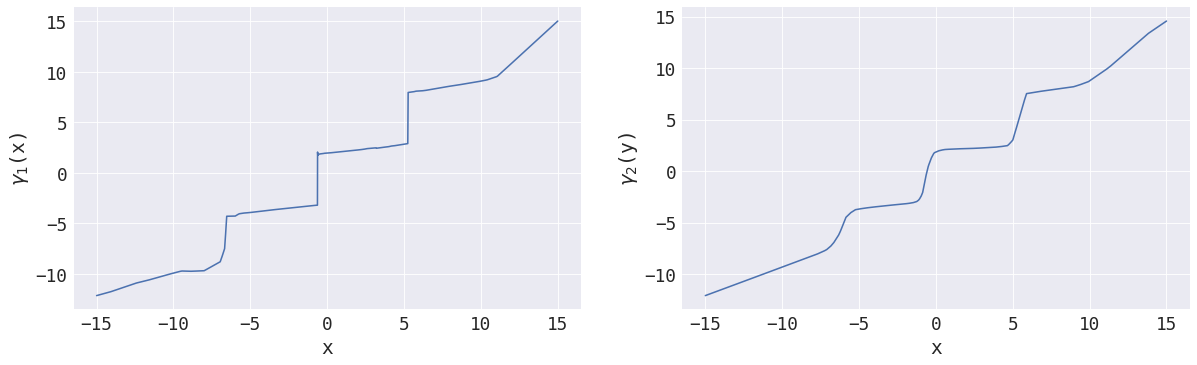

Iteration  3000 : current loss: 0.661389


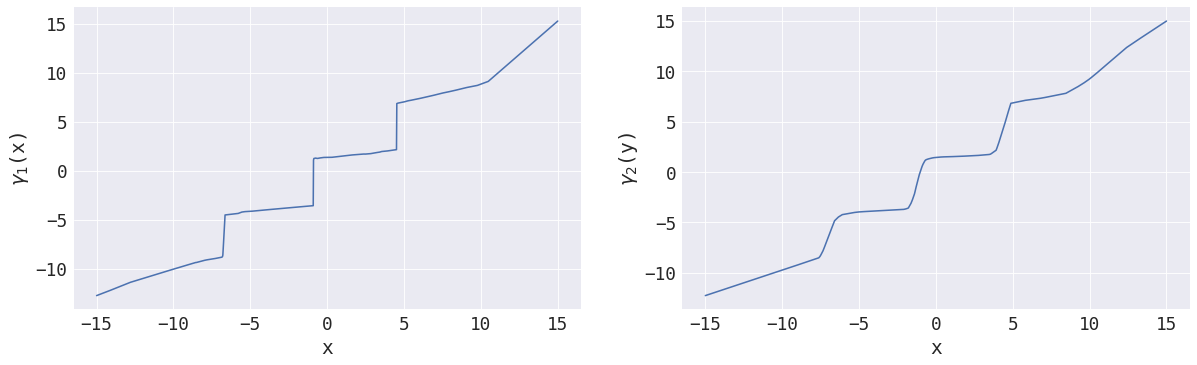

Iteration  3100 : current loss: 0.866344


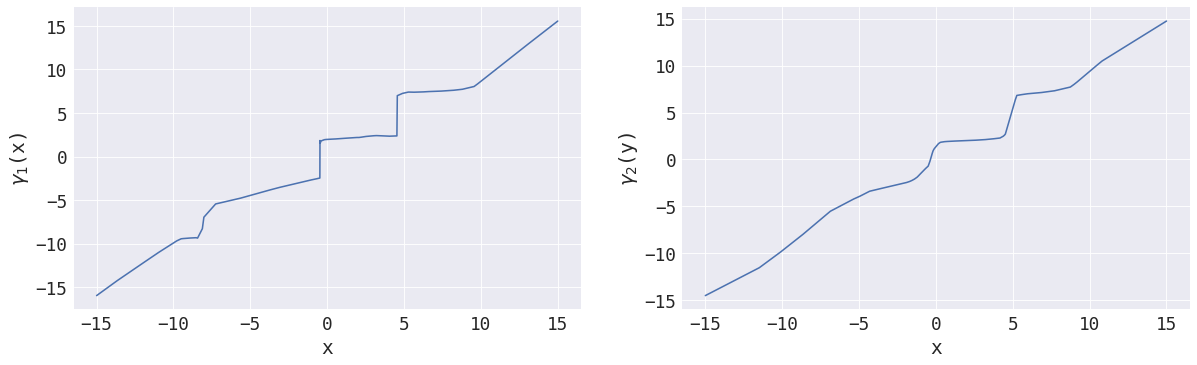

Iteration  3200 : current loss: 0.651386


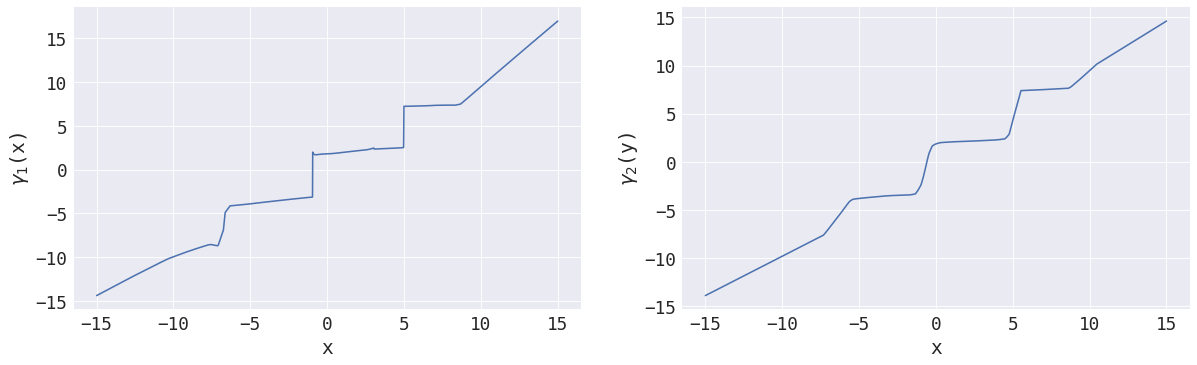

Iteration  3300 : current loss: 0.635919


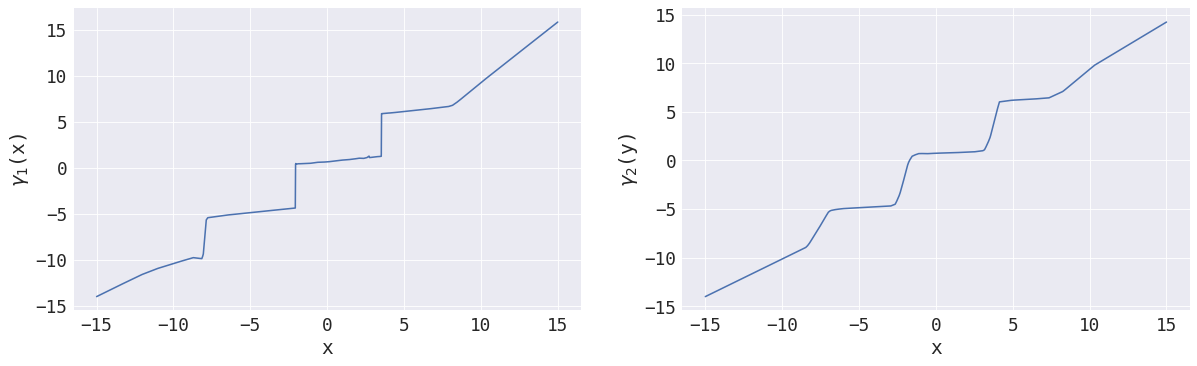

Iteration  3400 : current loss: 0.645712


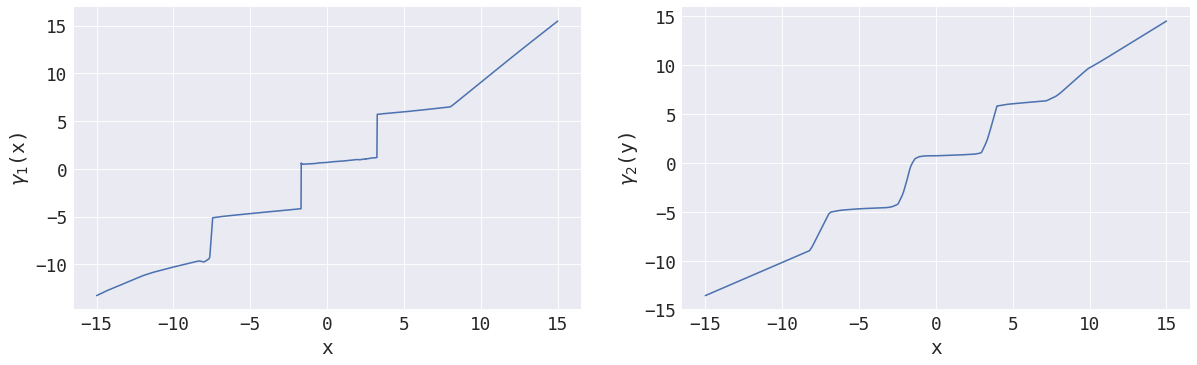

Iteration  3500 : current loss: 0.649893


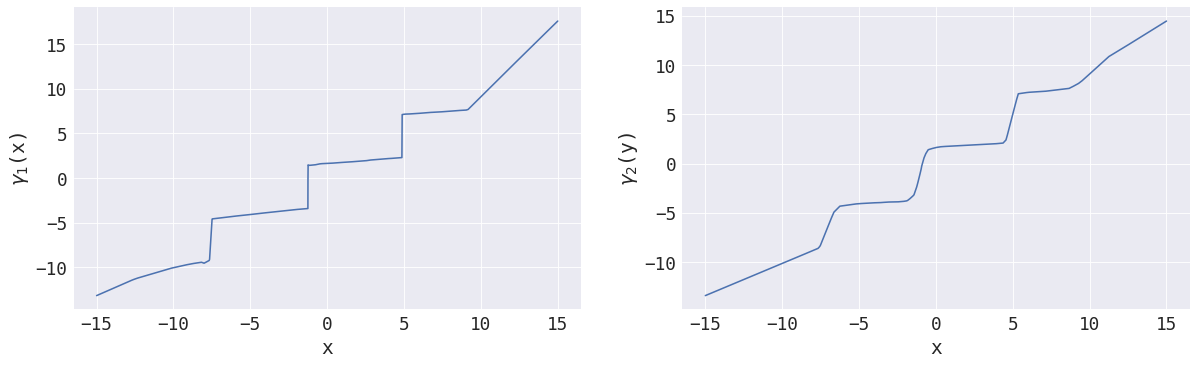

Iteration  3600 : current loss: 0.625029


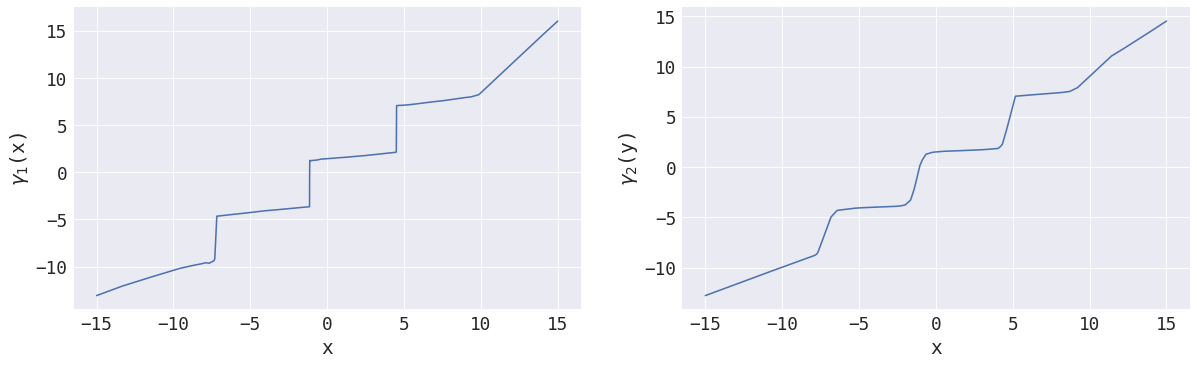

Iteration  3700 : current loss: 0.688845


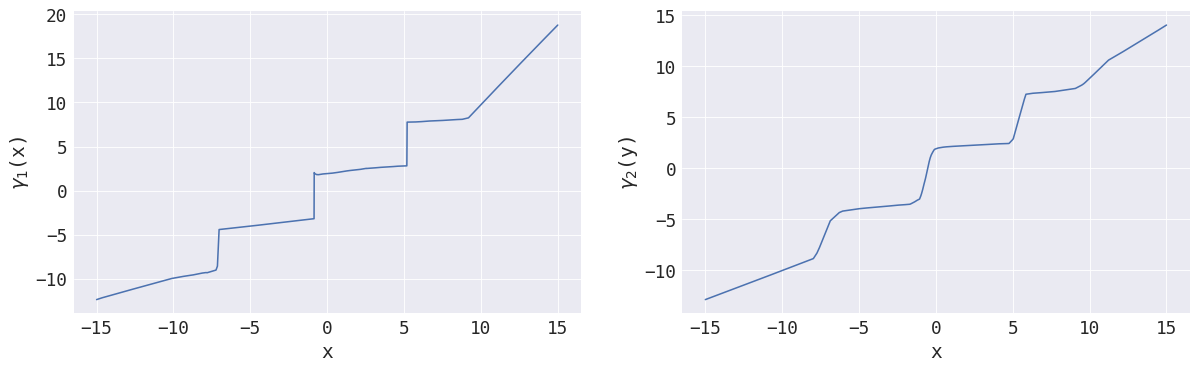

Iteration  3800 : current loss: 0.633326


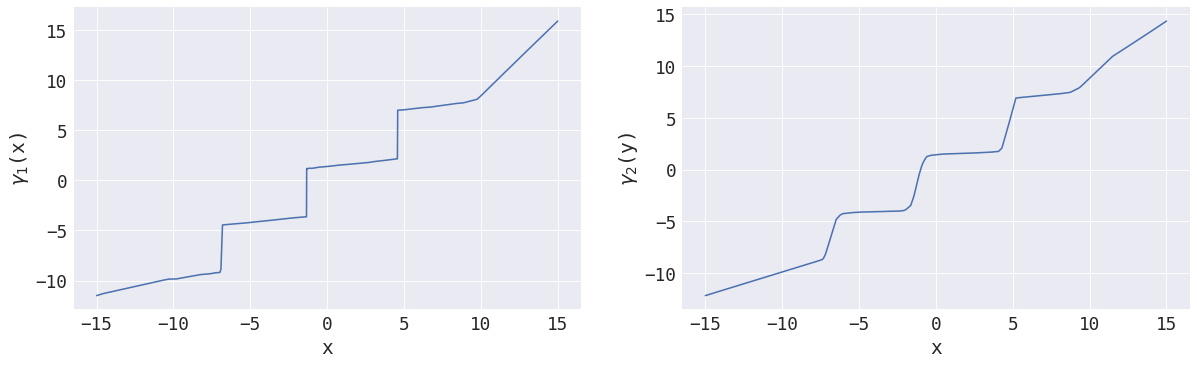

Iteration  3900 : current loss: 0.645999


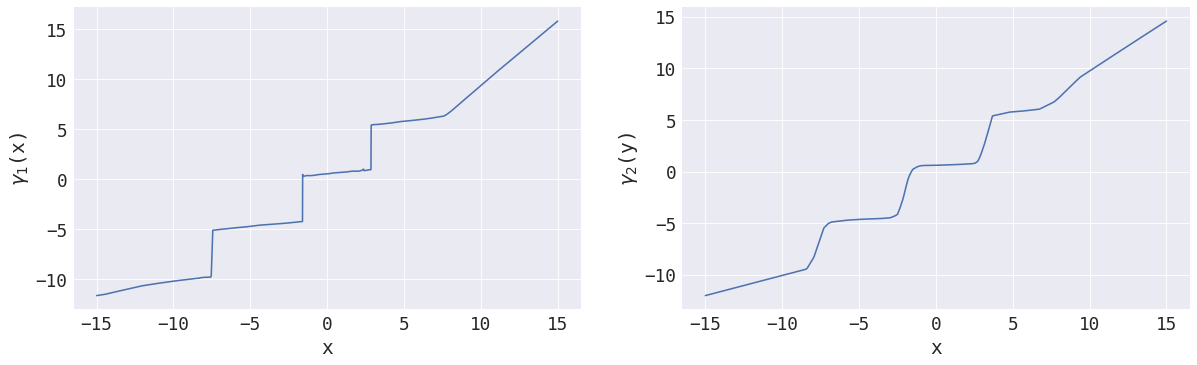

Iteration  4000 : current loss: 0.673855


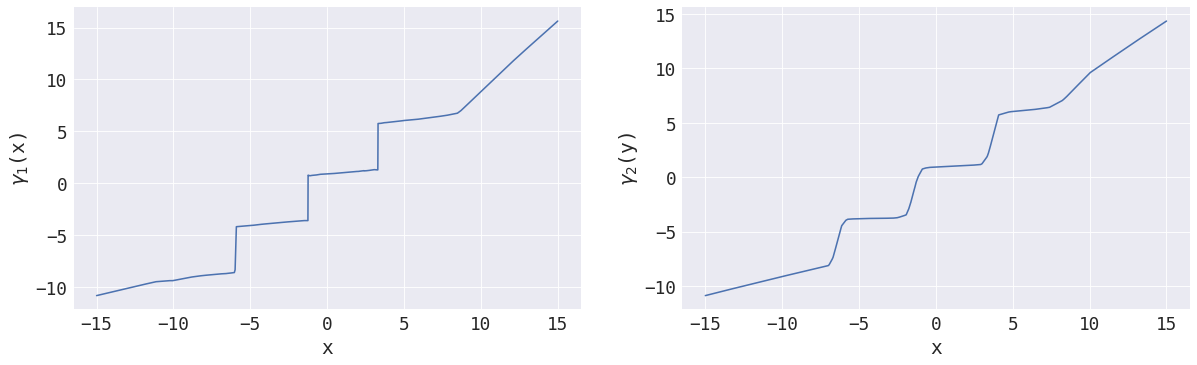

Iteration  4100 : current loss: 0.618908


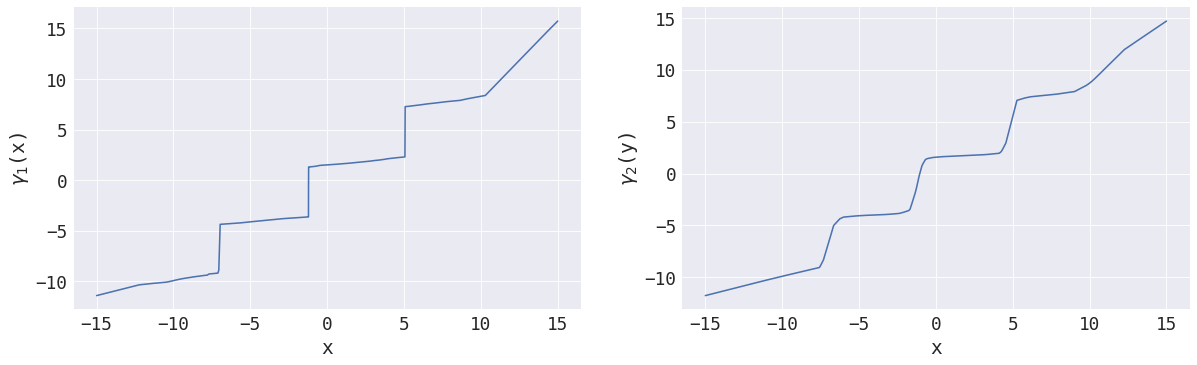

Iteration  4200 : current loss: 0.621365


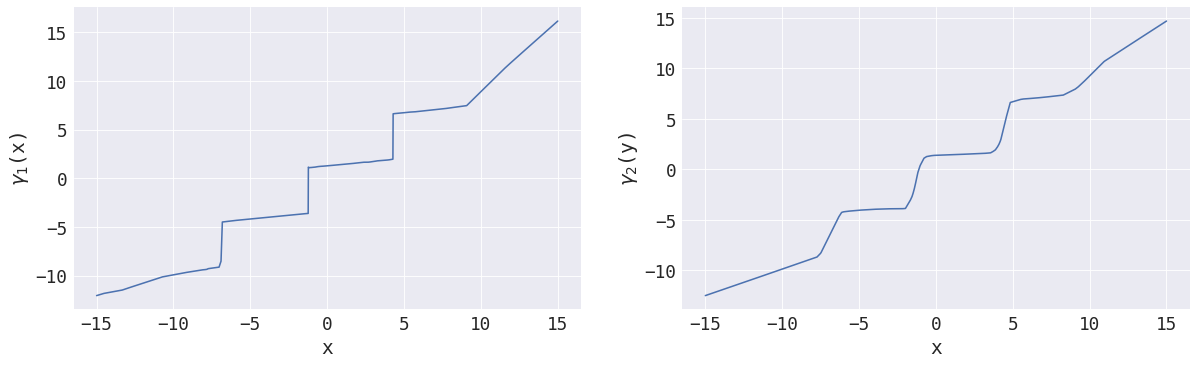

Iteration  4300 : current loss: 0.653963


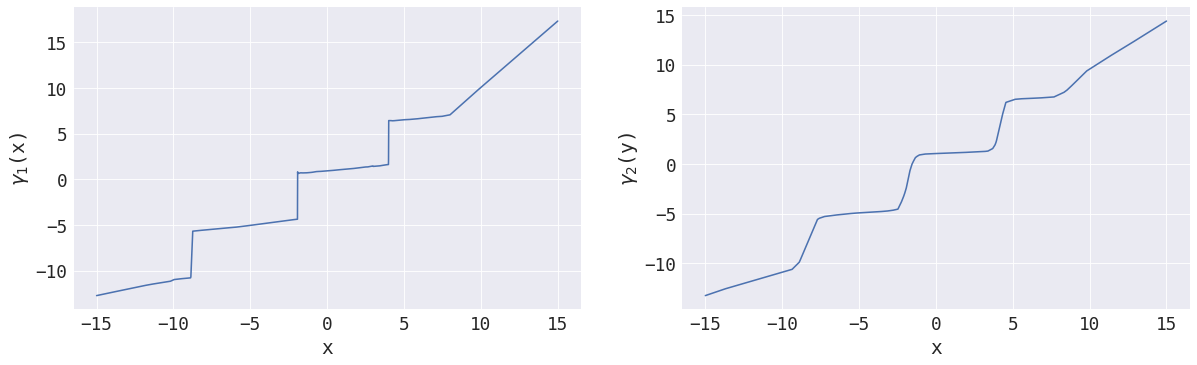

Iteration  4400 : current loss: 0.653412


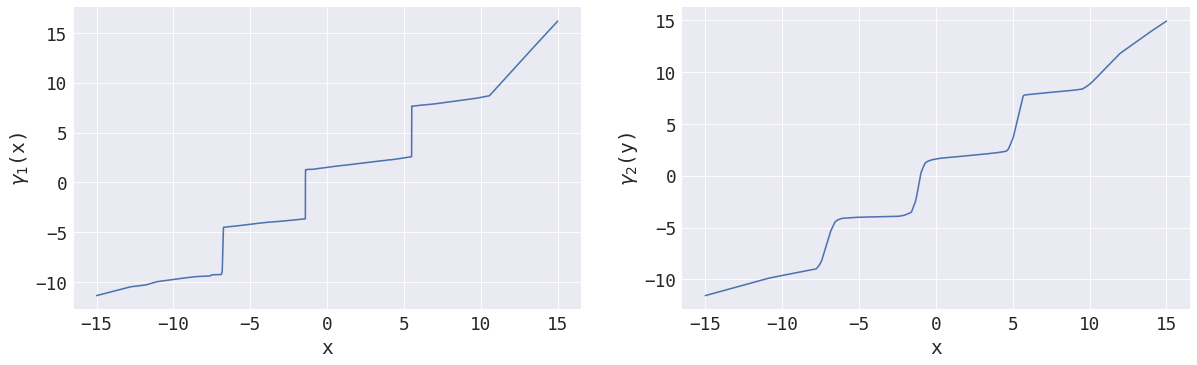

Iteration  4500 : current loss: 0.63102


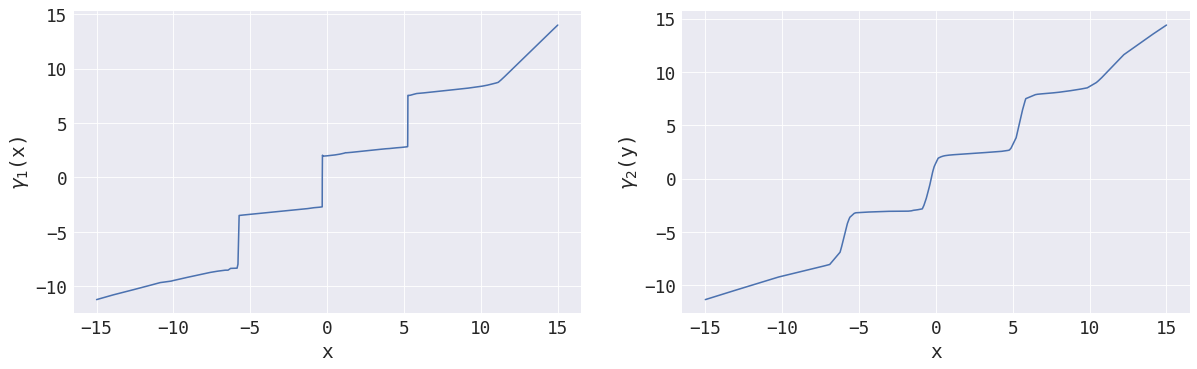

Iteration  4600 : current loss: 0.630365


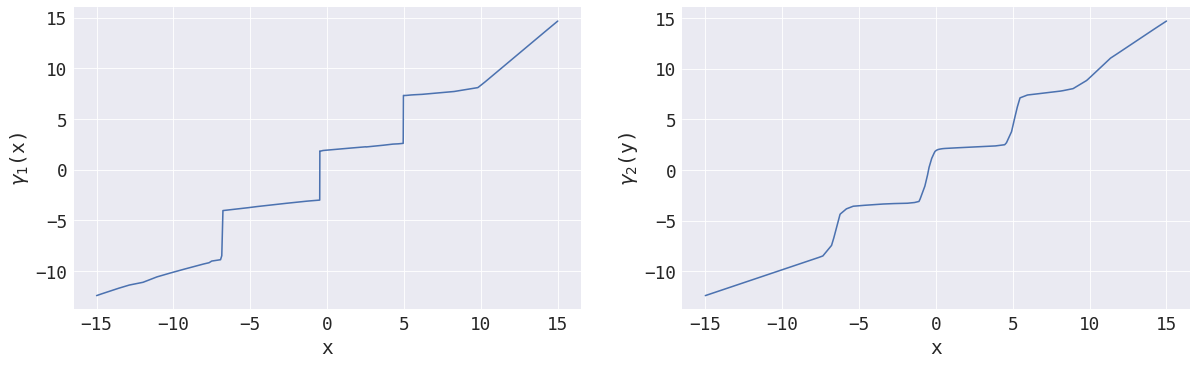

Iteration  4700 : current loss: 0.713064


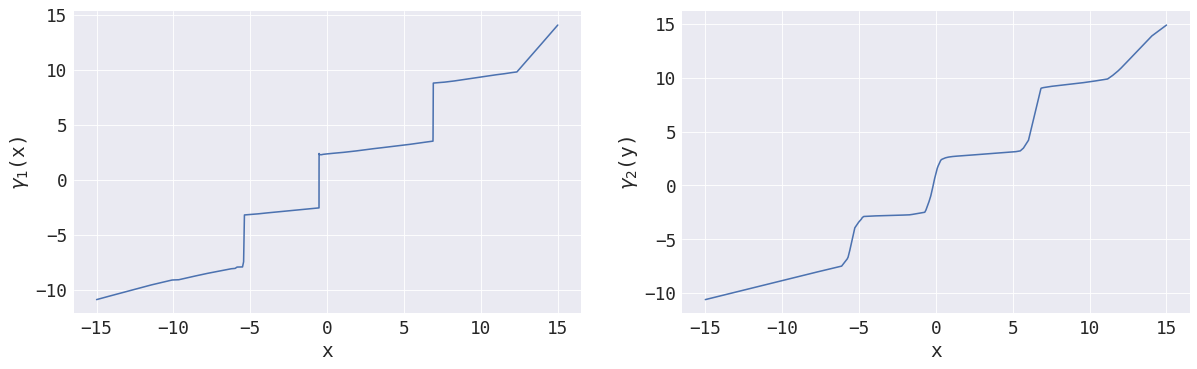

Iteration  4800 : current loss: 0.644527


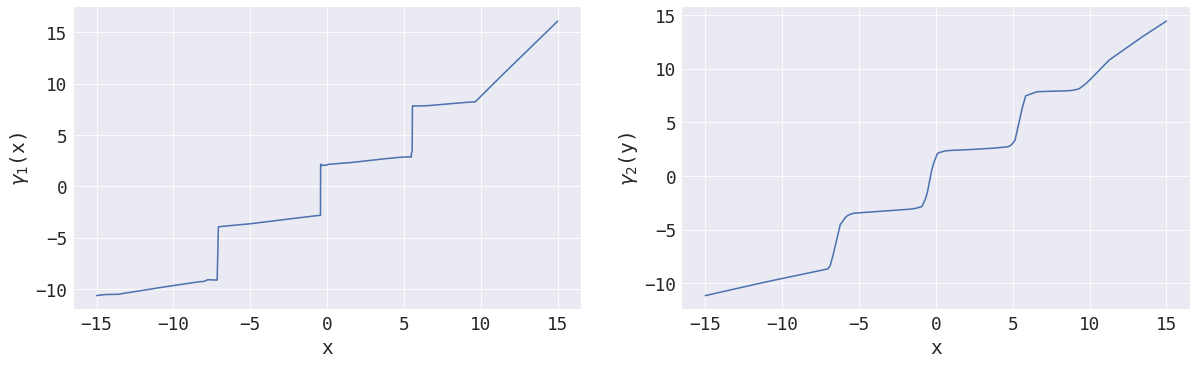

Iteration  4900 : current loss: 0.642118


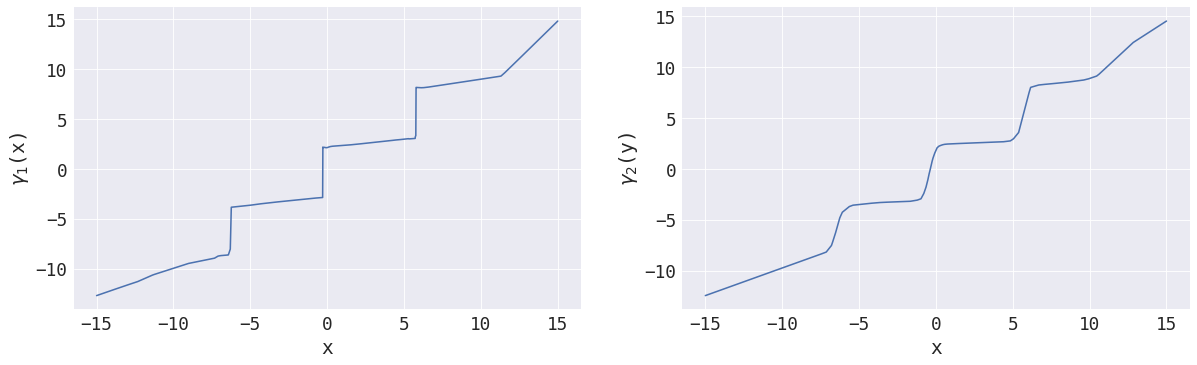

Iteration  5000 : current loss: 0.629008


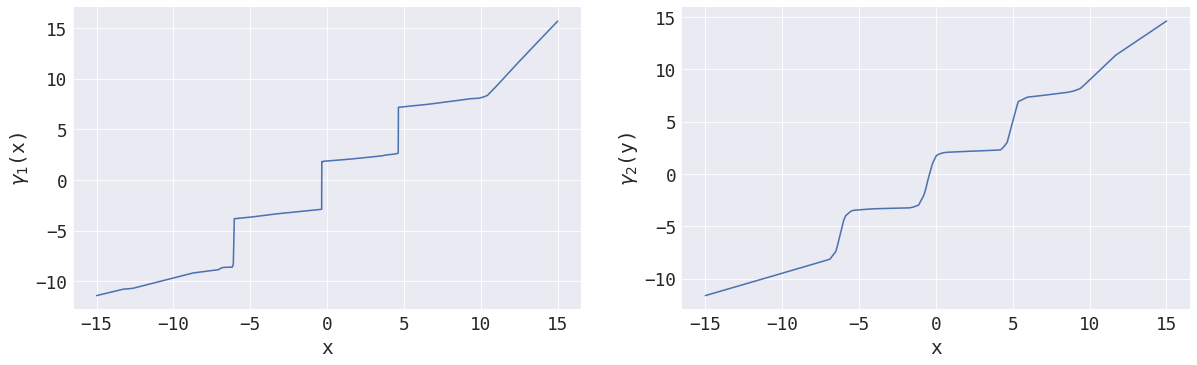

Iteration  5100 : current loss: 0.636176


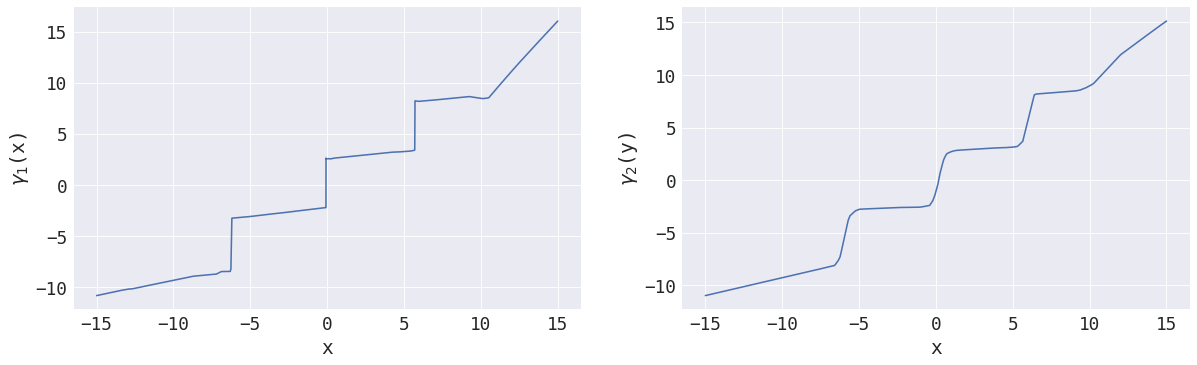

Iteration  5200 : current loss: 0.641086


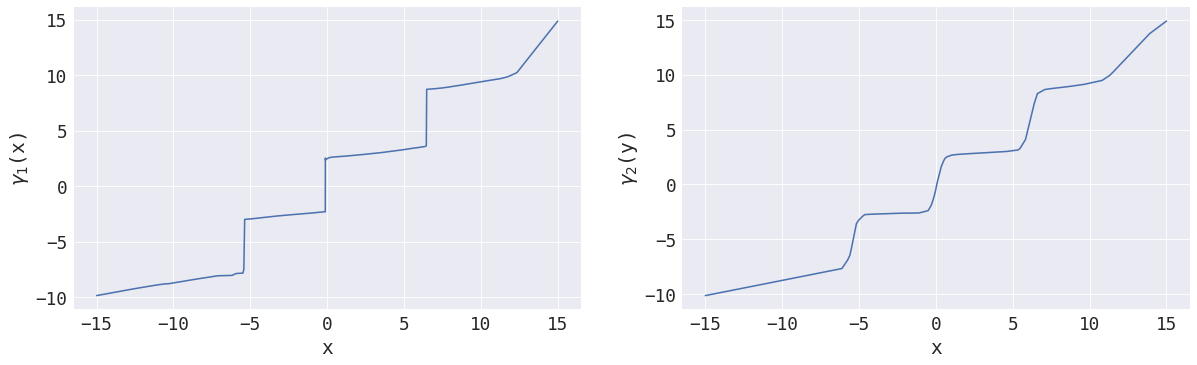

Iteration  5300 : current loss: 0.63826


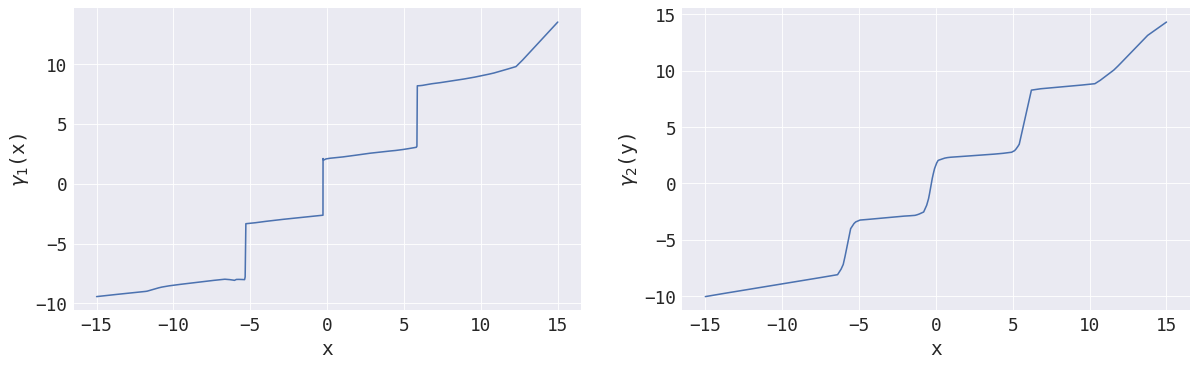

Iteration  5400 : current loss: 0.642067


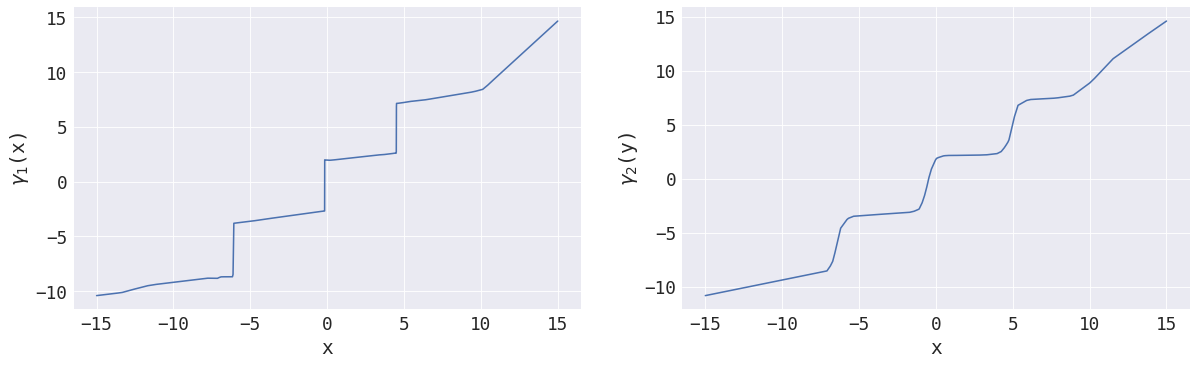

Iteration  5500 : current loss: 0.620052


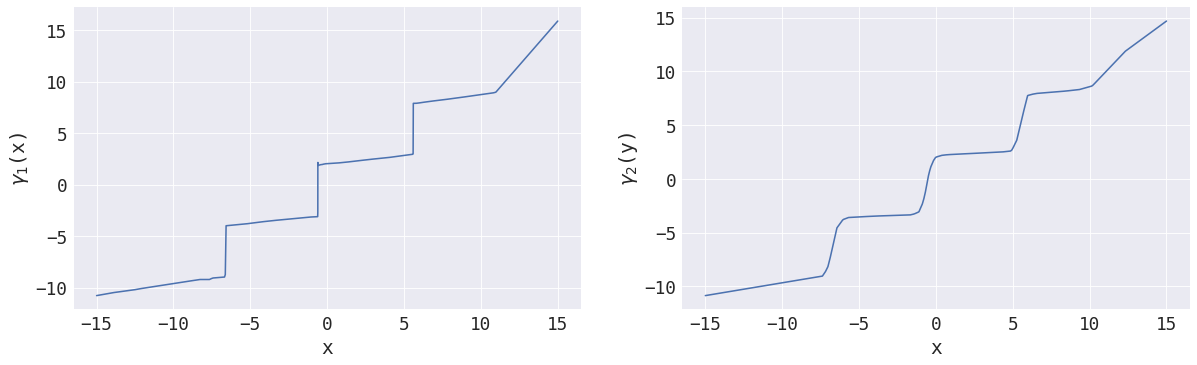

Iteration  5600 : current loss: 0.652347


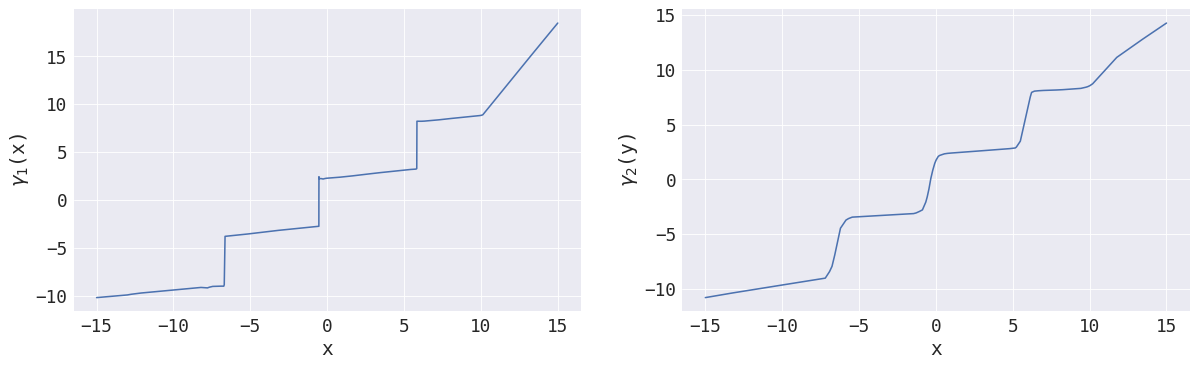

Iteration  5700 : current loss: 0.665413


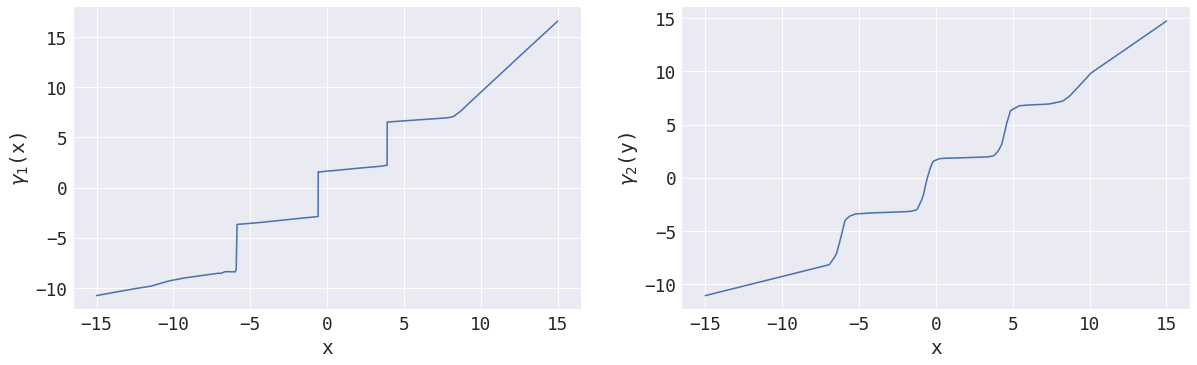

Iteration  5800 : current loss: 0.622361


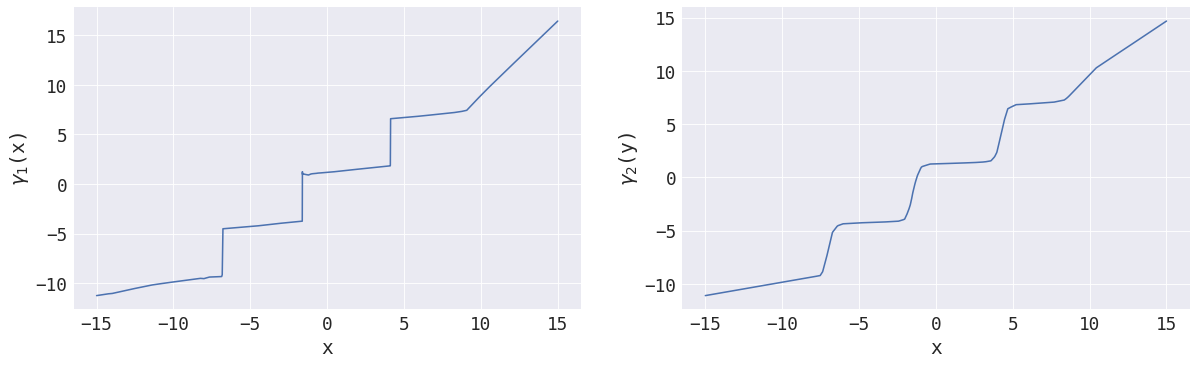

Iteration  5900 : current loss: 0.624977


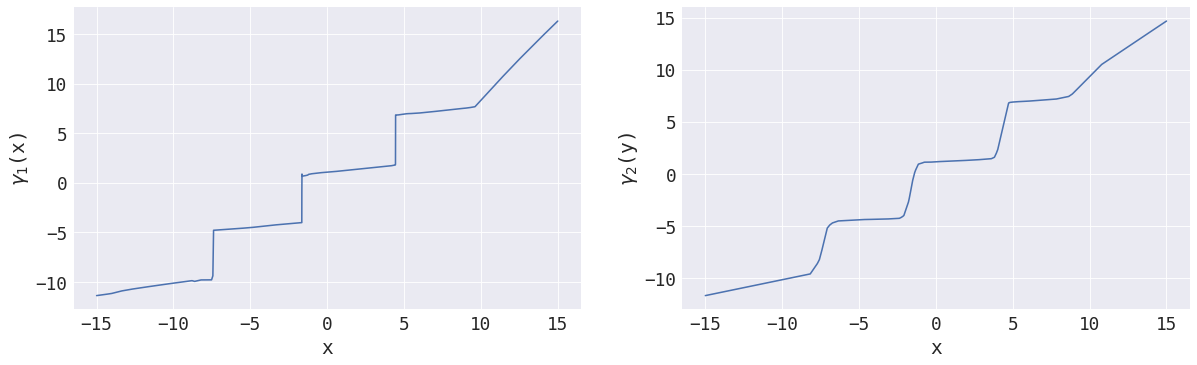

In [9]:
for i in range(6000): #30000 add more iteration here
    input_data = 5*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
    feed_dict2 =  {x:input_data, tmp_c : np.array([[1]]), disp : np.array([[0]])}
    sess.run(optimizer, feed_dict2)
    if i % 100 == 0:
        print('Iteration ',i,': current loss:',sess.run(loss,feed_dict2))
        fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
        plt.subplot(1,2,1)
        y_axis = sess.run(u1, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
        plt.plot(x_axis[:,0],y_axis[:,0])
        plt.xlabel('x')
        plt.ylabel('$\gamma_1$(x)')
        plt.subplot(1,2,2)
        y_axis = sess.run(u2, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
        plt.plot(x_axis[:,0],y_axis[:,0])
        plt.xlabel('x')
        plt.ylabel('$\gamma_2$(y)')
        plt.show()

# After optimization with loss

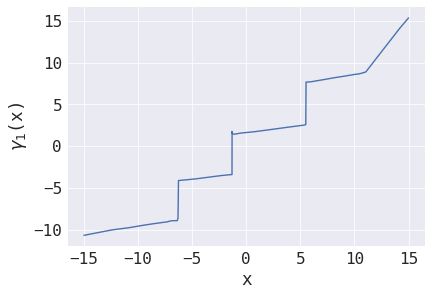

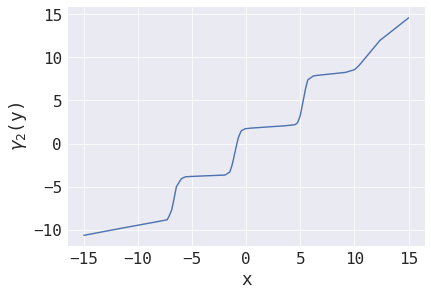

In [10]:
y_axis = sess.run(u1, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('$\gamma_1$(x)')
plt.show()
y_axis = sess.run(u2, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('$\gamma_2$(y)')
plt.show()

# 